## Part a)

Write a function which sets up a one-qubit basis and apply the various
Pauli matrices to these basis states. 
 Apply the Hadamard and Phase
gates to the same one-qubit basis states and study their actions on
these states. 

In [97]:
import numpy as np
import sympy as sp

In [98]:
# LaTeX help

def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

In [99]:
# set up one qubit basis
b0 = np.array([1,0])
b1 = np.array([0,1])

# define pauli matrices and Hadamard and phase gates
sx = np.matrix([[0,1],[1,0]])
sy = np.matrix([[0,-1j],[1j,0]])
sz = np.matrix([[1,0],[0,1]])
I = np.identity(2)
Hadamard = 1/np.sqrt(2) * np.matrix([[1,1],[1,-1]])
def phase(angle):
    return np.matrix([[1,0],[0,np.exp(1j * angle)]])

print(sx,sy,sz,Hadamard, phase(np.pi))
# Apply Hadamard and Phase gates to the same one-qubit states

print("Hadamard times b0: ", np.matmul(Hadamard, b0))
print("Phase times b0: ", np.matmul(phase(np.pi), b0))

print(bmatrix(np.matmul(Hadamard, b0)))

[[0 1]
 [1 0]] [[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]] [[1 0]
 [0 1]] [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]] [[ 1.+0.0000000e+00j  0.+0.0000000e+00j]
 [ 0.+0.0000000e+00j -1.+1.2246468e-16j]]
Hadamard times b0:  [[0.70710678 0.70710678]]
Phase times b0:  [[1.+0.j 0.+0.j]]
\begin{bmatrix}
  0.70710678 & 0.70710678\\
\end{bmatrix}


In [115]:
# Sympy calculations
from sympy.physics.quantum import TensorProduct

X = sp.Matrix([[0,1], [1,0]])
Y = sp.Matrix([[0,-1j], [1j,0]])
Z = sp.Matrix([[1,0], [0,-1]] )
basis0 = sp.Matrix([1,0])
basis1 = sp.Matrix([0,1])
Hadamard_sp = 1/sp.sqrt(2) * sp.Matrix([[1,1],[1,-1]])

# define Bell states
phiPlus_sp = 1/sp.sqrt(2) * (TensorProduct(basis0,basis0) + TensorProduct(basis1,basis1))

CNOT_sp = sp.Matrix([[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]])

print(sp.latex(Hadamard_sp @ basis0))

# 
tull = CNOT_sp @ TensorProduct(Hadamard_sp, sp.eye(2)) @ phiPlus_sp
print(sp.latex(tull))

\left[\begin{matrix}\frac{\sqrt{2}}{2}\\\frac{\sqrt{2}}{2}\end{matrix}\right]
\left[\begin{matrix}\frac{1}{2}\\- \frac{1}{2}\\\frac{1}{2}\\\frac{1}{2}\end{matrix}\right]


Define also Bell states and write a code where you
implement a Hadamard gate and thereafter a **CNOT** gate on one of the Bell
states of your choice. Perform thereafter a measurement on the first qubit and
thereafter on the second qubit. The measurements should be performed 
several times and it is the average results of these measurements
which should be discussed and presented.

Compare your code with the results obtained using **Qiskit** from the lectures of week 5.

In [15]:
# define Bell states

phiPlus = 1/np.sqrt(2) * (np.kron(b0,b0) + np.kron(b1,b1))
phiMinus = 1/np.sqrt(2) * (np.kron(b0,b0) - np.kron(b1,b1))
psiPlus = 1/np.sqrt(2) * (np.kron(b0,b1) + np.kron(b1,b0))
psiMinus = 1/np.sqrt(2) * (np.kron(b0,b1) - np.kron(b1,b0))
bellStates = np.array([phiPlus, phiMinus, psiPlus, psiMinus])
print("All Bell States")
print(bellStates)


# define 4D Hadamard and CNOT
Hadamard4D = np.kron(Hadamard, Hadamard)
CNOT = np.matrix([[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]])
CNOT = np.kron(I, np.matrix([[1,0],[0,0]])) + np.kron(sx, np.matrix([[0,0],[0,1]]))
print("Hadamard 4D: ")
print(Hadamard4D)
print("CNOT: ")
print(CNOT)

# Apply first Hadamard4D on Bellstates and then CNOT on bell states

# Apply hadamard
product = np.matmul(Hadamard4D,bellStates[0])
product = np.matmul(CNOT,product.T)
print("Applied Hadamard and CNOT to bellState 0")
print(product)
print(bmatrix(product))

print("bellState 0")
print(bmatrix(bellStates[0]))

All Bell States
[[ 0.70710678  0.          0.          0.70710678]
 [ 0.70710678  0.          0.         -0.70710678]
 [ 0.          0.70710678  0.70710678  0.        ]
 [ 0.          0.70710678 -0.70710678  0.        ]]
Hadamard 4D: 
[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]
CNOT: 
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
Applied Hadamard and CNOT to bellState 0
[[0.70710678]
 [0.70710678]
 [0.        ]
 [0.        ]]
\begin{bmatrix}
  0.70710678\\
  0.70710678\\
  0.\\
  0.\\
\end{bmatrix}
bellState 0
\begin{bmatrix}
  0.70710678 & 0. & 0. & 0.70710678\\
\end{bmatrix}


Brute force without qiskit

In [35]:
I = np.array(np.eye(2))
H = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
S = np.array([[1, 0], [0, 1j]])

operators = {'I':I, 'H':H, 'X':X, 'Y':Y, 'Z':Z, 'S':S}

In [95]:
# Help from ChatGPT on flattening lists in Python:
def flatten(lst):
    for sublist in lst:
        for item in sublist:
            yield item


print(f'phiPlus = {phiPlus}')

# from week2/ipynb/codeskeran.ipynb
from collections import Counter

def measure(state, n_shots=1):

    probability = np.abs(state**2)
    n_qubits = int(np.sqrt(len(state))) 
    allowed_outcomes = np.arange(len(state))
        # print(state)
    outcomes = np.random.choice(allowed_outcomes, p=probability, size = n_shots)
#     print(f'outcomes = {outcomes}')
#     print(f'probability = {probability}')
    
    state = np.zeros_like(state)
    state[outcomes[-1]] = 1
    counts = Counter(outcomes)
    print(counts)
    outcomes_count = np.zeros((len(state),2),dtype=object) # 2: state and count
    for i in range(len(state)):
        if i in counts:
            outcomes_count[i] = counts[i], format(i, f"0{n_qubits}b")
        else:
            outcomes_count[i] = 0,format(i, f"0{n_qubits}b")
                
    return outcomes_count

state = np.array([1,0], dtype=np.complex128)
H_state = operators['H'] @ state
print(f'state = {state}')
print(f'state2 = {state2}')
# state2 = np.array([ 0.5, -0.5,  0.5,  0.5], dtype=np.complex128)
state2 = CNOT @ np.kron(H, I) @ phiPlus
flattened_array = np.array(state2.flatten())
print(f'type(state2) = {type(state2)}')
# print(f'list(flatten(state2)) = {list(flatten(state2))}')
# measure(state, n_shots=1000)
# measure(H_state, n_shots=1000)

# We set the seed so that we can reproduce the results.
# Set the seed
np.random.seed(42)
measure(flattened_array[0], n_shots=10000)

phiPlus = [0.70710678 0.         0.         0.70710678]
state = [1.+0.j 0.+0.j]
state2 = [[ 0.5 -0.5  0.5  0.5]]
type(state2) = <class 'numpy.matrix'>
Counter({0: 2547, 1: 2529, 2: 2511, 3: 2413})


array([[2547, '00'],
       [2529, '01'],
       [2511, '10'],
       [2413, '11']], dtype=object)

In [16]:

# perform measurement on first qubit (<psi| |0><0| x 1 |psi> )
# first qubit
proj0 = np.kron(np.reshape(np.kron(b0,b0),(2,2)), I)
print("Projection operator first qubit: ")
print(proj0)
print("Measurement performed on first qubit: ", np.matmul(bellStates[0],np.matmul(proj0.T, product)))
# second qubit
proj1 = np.kron(I,np.reshape(np.kron(b1,b1),(2,2)))
print("Projection operator second qubit: ")
print(proj1)
print("Measurement performed on second qubit: ", np.matmul(bellStates[0],np.matmul(proj0.T, product)))


Projection operator first qubit: 
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Measurement performed on first qubit:  [[0.5]]
Projection operator second qubit: 
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]
Measurement performed on second qubit:  [[0.5]]


In [86]:
print(f'proj0 = {proj0}')
print(phiPlus)
# type(phiPlus)
# type(H_state)
# H_state @ phiPlus
# np.kron(H_state, I) @ phiPlus
# state2 = Hadamard4D @ CNOT @ phiPlus
state2 = CNOT @ np.kron(H, I) @ phiPlus
print(f'state2 = {state2}')
print(f'type(state2) = {type(state2)}')
flattened_array = np.array(state2.flatten())
print(f'flattened_array = {flattened_array}')
print(f'type(flattened_array) = {type(flattened_array)}')
print(flattened_array[0])
print(state2[0])

proj0 = [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[0.70710678 0.         0.         0.70710678]
state2 = [[ 0.5 -0.5  0.5  0.5]]
type(state2) = <class 'numpy.matrix'>
flattened_array = [[ 0.5 -0.5  0.5  0.5]]
type(flattened_array) = <class 'numpy.ndarray'>
[ 0.5 -0.5  0.5  0.5]
[[ 0.5 -0.5  0.5  0.5]]


# Comparison with qiskit

In [19]:
import qiskit as qk
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np
from qiskit import transpile

# initialize constants for quantum circuit
nqubits = 1
ncbits = 1
qreg = qk.QuantumRegister(nqubits)
creg = qk.ClassicalRegister(ncbits)

# create circuit, apply gate and draw the circuit (you sadly can't draw multiple circuits, so just change the gate for each gate you want to analyze)
c = qk.QuantumCircuit(qreg,creg)
c.x(qreg[0])
c.measure(qreg[0], creg[0])
c.draw()

┌───┐┌─┐
  q3: ┤ X ├┤M├
      └───┘└╥┘
c2: 1/══════╩═
            0

In [23]:
simulator = AerSimulator()

C:\Users\a504654\AppData\Local\Temp\ipykernel_22792\712009985.py:42: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = qk.execute(state, simulator, shots=1000)


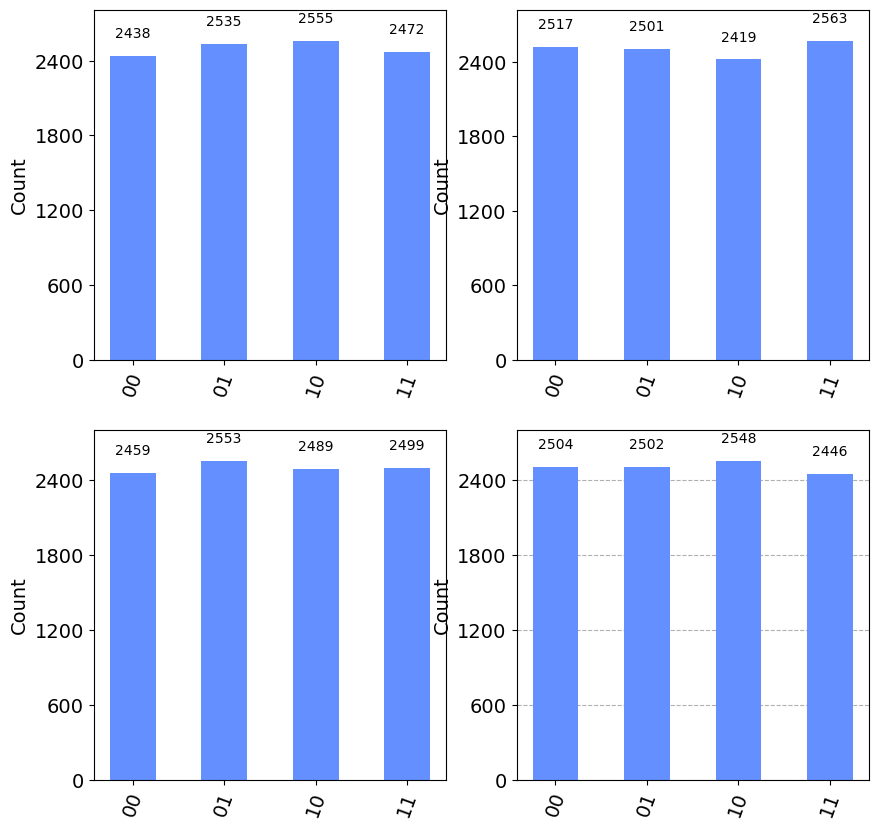

In [54]:
# initalize Bell states
phi_plus = QuantumCircuit(2,2)
phi_plus.h(0)
phi_plus.cx(0,1)
phi_plus.measure([0,1],[0,1])

phi_minus = QuantumCircuit(2,2)
phi_minus.h(0)
phi_minus.cx(0,1)
phi_minus.z(0) # you can flip 1 in this case too, but not both obviously
phi_minus.measure([0,1],[0,1])

psi_plus = QuantumCircuit(2,2)
psi_plus.h(0)
psi_plus.cx(0,1)
psi_plus.x(0) 
psi_plus.measure([0,1],[0,1])

psi_minus = QuantumCircuit(2,2)
psi_minus.h(0)
psi_minus.cx(0,1)
psi_minus.x(0)
psi_minus.z(0)
psi_minus.measure([0,1],[0,1])

bell_states = [phi_plus, phi_minus, psi_plus, psi_minus]


# apply Hadamard and CNOT to every Bell state
for i in range(0,4):
    # Apply gates
    bell_states[i].h(0)
    bell_states[i].cx(0,1)
    # measure the qubits and draw the circuit
    bell_states[i].measure([0,1],[0,1])

# Plot results
all_results = []

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i,state in enumerate(bell_states):
    job = qk.execute(state, simulator, shots=1000)
    new_circuit = transpile(state, simulator)
    job =simulator.run(new_circuit, shots = 10000)
    all_results.append(job.result().get_counts(state))
    plot_histogram(all_results[-1], ax=axes[int(i/2),i%2])